# IMPORTANT

## The notebook should be named as ADS_HW5_<net_id>
## 10 pts will be deducted if the naming convention is not followed

# Task 1 (5 pts) 


a) Provide a definition for the concept of a conjugate prior given the Bayesian learning model

b) True or False:
Selecting a Gaussian prior for a likelihood function that is Gaussian, will ensure that the posterior distribution is also Gaussian

##### a). The Prior Distribution is a conjugate prior for the Likelihood Function if after applying the Likelihood Function, the Prior Distribution belongs to the same distribution family as the Posterior Function. The Prior and Posterior are called conjucate distribution.
##### b). True

# Task 2 (5 pts). 


1) In the Bayesian linear regression framework (True or False)  
    a) Using a Laplacian prior will lead to the Ridge Regression  
    b) Using a Laplacian prior will lead to Lasso Regression

2) (True or False)  
    a) Ridge can often help with feature selection  
    b) Lasso can often help with feature selection

#### 1)
* a) False
* b) True

#### 2)
* a) False
* b) True

# Task 3 (10 pts). 
Answer some questions about the properties of Lasso/Ridge:

1.a) Which regression adds penalty equivalent to square of the magnitude of coefficients?  
1.b) Which regression adds penalty  equivalent to absolute value of the magnitude of coefficients?

2) Which of the Lasso and Ridge regressions possess an analytic solution in the closed form?

3) Which of the Lasso and Ridge regression is often use to completely eliminate coefficients for some of the regressors?

4) Which value of $\lambda$ makes Lasso and Ridge identical to the ordinary least square regression?

5) What dataset (training, validation or test) you would use to estimate the $\lambda$ for Lasso or Ridge?

# Extra Credit(50 pts to be applied towards this or any other homework)
For a regression where the variables are highly correlated, which would you use, Lasso or Ridge and why?

#### 1)
* a)Ridge
* b)Lasso

#### 2) Ridge
#### 3) Lasso
#### 4) λ = 0
#### 5) Training dataset

#### Extra Credit
##### Ridge would be the choice.
* Suppose we have a training dataset and a linear model  Y=X1+X2 to fit the data. Given that the two predictor variables X1 and X2 are highly correlated, so many linear combinations of X1, X2 can be excellent substituents of X1 and X2 and act as equally good predictors, for example Y = 0.2X1+0.8X2, Y = 0.3X1+0.7X1, or Y = 0.5X1+0.5X2. The ridge penalty on the parameter vector is C^2+D^2 while the lasso penalty term is ∣C∣+∣D∣. The lasso penalty in all three examples are equal, which is 1, while the ridge penalty terms are respectively 0.68, 0.58, 0.5. In the situation that the available information or data provides little instruction on choosing the different linear combinations of predictors, the ridge penalty will prefer equal weighting of correlated variables while lasso penalty will not be able to choose. Equal weighting might be a better guess for future data because all other scenarios might cause the model to overfit current training data. 
* Consequently, Ridge regression models are much more stable than LASSO regrssion models, since the coefficients of Ridge regression do not have fluctuant behaviour as LASSO regression coefficients do. This quality of stability makes Ridge regression a good choice for data interpretation. 
* If feature selection is the prime concern, LASSO regression will be preferred because it forces weak features to have zero as coefficients and only strong features are retained. 

# Task 4 (15 pts). 
Consider a Bayesian univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a given $\sigma=2$ and the prior $w\sim {\cal N}(4,2)$. Compute the posterior distribution after an observation $y=14,x=4$. After all, what is the probability of having $w<4$?

In [2]:
from scipy import stats

$$
p(w|Y, X)\sim e^{-w^2 \frac{\sum_i x_i^2(\sigma^*)^2+\sigma^2}{2\sigma^2(\sigma^*)^2}+w \frac{(\sigma^*)^2 \sum_i y_i x_i+\sigma^2 w^*}{2\sigma^2(\sigma^*)^2}}\sim e^{\frac{\left(w-\frac{ \sigma^{-2} \sum_i y_i x_i +(\sigma^*)^{-2} w^*}{\left(\sum_i x_i^2\sigma^{-2}+(\sigma^*)^{-2}\right)}\right)^2}{\frac{2}{(\sigma^*)^{-2}+\sum_i x_i^2\sigma^{-2}}}}\sim
$$

$$
\sim {\cal N}\left(\frac{ \sigma^{-2} \sum_i y_i x_i +(\sigma^*)^{-2} w^*}{\left(\sum_i x_i^2\sigma^{-2}+(\sigma^*)^{-2}\right)},
\frac{1}{\sqrt{(\sigma^*)^{-2}+\sum_i x_i^2\sigma^{-2}}}\right)
$$

In [3]:
sigma = 2
psigma = 2
Ew = 4
w0 = (sigma**-2*14*4 + psigma**-2*Ew) / (4*4*sigma**-2 + psigma**-2)
s0 = (psigma**-2 + 4*4*sigma**-2)**(-0.5)
print("w ~ N({0}, {1})".format(w0, s0))

w ~ N(3.52941176471, 0.485071250073)


In [4]:
print("the probability of having w<4 is:{}".format(stats.norm.cdf(4, w0, s0)))

the probability of having w<4 is:0.834012266459


# Task 5 (20 pts)
For the training and test sets provided below, train a linear regression of $y$ (last column) vs the rest of the columns of the table treated as regressors (intercept excluded) over the training set, apply it to the test set and report it's R2 performance over both - training and test set.

In [5]:
## Learn to use numpy - Will be more useful in future
import pandas as pd
import numpy as np

data_train=pd.read_csv("HW_train.csv")
data_test=pd.read_csv("HW_test.csv")

# Remove unwanted column
data_train.drop('Unnamed: 0',axis=1, inplace=True)
data_test.drop('Unnamed: 0',axis=1, inplace=True)

In [6]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,96.789835,83.183133,24.177181,31.279398,-49.029524,18.872176,168.942794,94.488018,177.780409,27.695043,...,41.924134,65.876185,35.898562,34.726463,60.166744,22.004965,43.487052,60.069264,63.794491,65.691782
1,38.829317,35.843956,6.297793,15.523440,-21.995928,5.945662,72.037611,42.709207,75.362195,10.284752,...,73.765030,47.088544,43.625197,1.265374,53.481250,61.989699,22.419371,72.934372,8.783550,48.600203
2,29.925224,25.328958,0.102627,10.403224,-16.379497,4.272577,54.941945,33.758282,58.327999,5.344682,...,17.970740,28.483208,43.124356,75.088879,16.991777,3.603125,70.197916,45.761354,16.291789,11.967305
3,33.424303,27.676937,4.533496,12.010908,-18.159244,4.777495,54.333856,31.886517,61.607712,6.907591,...,97.752102,0.751484,20.599931,95.431639,30.861203,22.548684,93.988541,12.820426,47.022745,15.988018
4,69.816320,61.489566,17.181358,24.093144,-35.745184,13.386441,122.288929,68.878098,128.452555,18.808763,...,70.996612,86.602438,98.127347,5.357836,87.865145,40.298166,86.488322,60.963969,84.368874,53.736157


In [7]:
data_train.columns = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17',
                     'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34',
                     'x35', 'x36', 'x37', 'x38', 'x39', 'Y']
data_train.head(2)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x31,x32,x33,x34,x35,x36,x37,x38,x39,Y
0,96.789835,83.183133,24.177181,31.279398,-49.029524,18.872176,168.942794,94.488018,177.780409,27.695043,...,41.924134,65.876185,35.898562,34.726463,60.166744,22.004965,43.487052,60.069264,63.794491,65.691782
1,38.829317,35.843956,6.297793,15.523440,-21.995928,5.945662,72.037611,42.709207,75.362195,10.284752,...,73.765030,47.088544,43.625197,1.265374,53.481250,61.989699,22.419371,72.934372,8.783550,48.600203


In [8]:
import statsmodels.formula.api as smf
model = smf.ols(formula = 'Y ~ '+ '+'.join(data_train.columns[:-1]) + '-1', data = data_train).fit()
OLS_coef = model.params
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Mon, 27 Nov 2017   Prob (F-statistic):                nan
Time:                        23:05:07   Log-Likelihood:                 812.26
No. Observations:                  30   AIC:                            -1565.
Df Residuals:                       0   BIC:                            -1522.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x0             2.3096        inf          0        n

In [9]:
def modelEval(lm, key = 'Y'):
    lmy = lm.predict(data_train)
    y_err = lmy - data_train[key]
    y_norm = data_train[key]-np.mean(data_train[key])
    return 1-y_err.dot(y_err)/y_norm.dot(y_norm)

In [10]:
print('R2 performance over training data: %f'%modelEval(model))

R2 performance over training data: 1.000000


In [11]:
data_test.columns = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17',
                     'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34',
                     'x35', 'x36', 'x37', 'x38', 'x39', 'Y']
data_test.head(2)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x31,x32,x33,x34,x35,x36,x37,x38,x39,Y
0,24.614936,22.521951,2.197478,9.819148,-17.840580,4.038417,45.040223,27.920974,48.337288,5.541484,...,85.107110,28.738932,39.532761,28.256818,85.133257,71.739674,82.660726,26.841269,42.092646,18.27435
1,45.453889,38.598541,6.868511,15.599206,-24.764269,7.090872,78.266837,42.097695,81.749616,12.269276,...,92.923858,65.545650,5.055256,4.123023,45.566800,39.565349,22.327959,27.841619,7.512355,33.72050


In [12]:
def modelEval2(lm, key = 'Y'):
    lmy = lm.predict(data_test)
    y_err = lmy - data_test[key]
    y_norm = data_test[key]-np.mean(data_test[key])
    return 1-y_err.dot(y_err)/y_norm.dot(y_norm)

In [13]:
print('R2 performance over test data: %f'%modelEval2(model))

R2 performance over test data: -1.027964


# Task 6 (20 pts)
Train Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=3000$ and $\lambda_{Lasso}=30$ and report their performance over the test set.

In [14]:
from scipy import stats
from sklearn import linear_model

In [15]:
X_train = data_train.ix[:,:-1]
y_train = data_train.ix[:,-1]
X_test = data_test.ix[:,:-1]
y_test = data_test.ix[:,-1]

In [16]:
Ridge=linear_model.Ridge(fit_intercept=True, alpha=1) 

Ridge.fit(X_train,y_train)
# In the sample:
p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared of Ridge Regression for training dataset is: {0}".format(R_2_IS_Ridge))

Ridge_coef=Ridge.coef_

#Out of sample
p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared of Ridge  Regression for test dataset is: {0}".format(R_2_OS_Ridge))

The R-squared of Ridge Regression for training dataset is: 0.999390960997
The R-squared of Ridge  Regression for test dataset is: -0.677447117557


In [17]:
Lasso=linear_model.Lasso(fit_intercept=True,alpha=30)

Lasso.fit(X_train,y_train)

p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared of Lasso regression for training sample is: {0}".format(R_2_IS_Lasso))

Lasso_coef=Lasso.coef_

p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared of Lasso regression for test set is: {0}".format(R_2_OS_Lasso))

The R-squared of Lasso regression for training sample is: 0.878135684241
The R-squared of Lasso regression for test set is: 0.648004682015


# Task 7 (25 pts)
a) For each $m=0,1,2,...39$ train OLS, Lasso and Ridge regressions(keep intercept) using the data from Task 5 above with $\lambda_{Ridge}=3000$ and $\lambda_{Lasso}=30$ using the first $m$ columns of the data tables as the regressors  
i.e train the models by adding in a new variable each time. eg. Y~ x0, Y~x0+x1, Y~x0+x1+x2...Y~x0+x1+...+x39  

b) Plot the in-sample (training) and out-of-sample (test) R2 for all three models on the same graph.  
i.e (x-axis is number of regressors, y will be your R^2 for InSample & OutSample for each of the 3 models, all in one graph)


In [18]:
import matplotlib.pyplot as plt

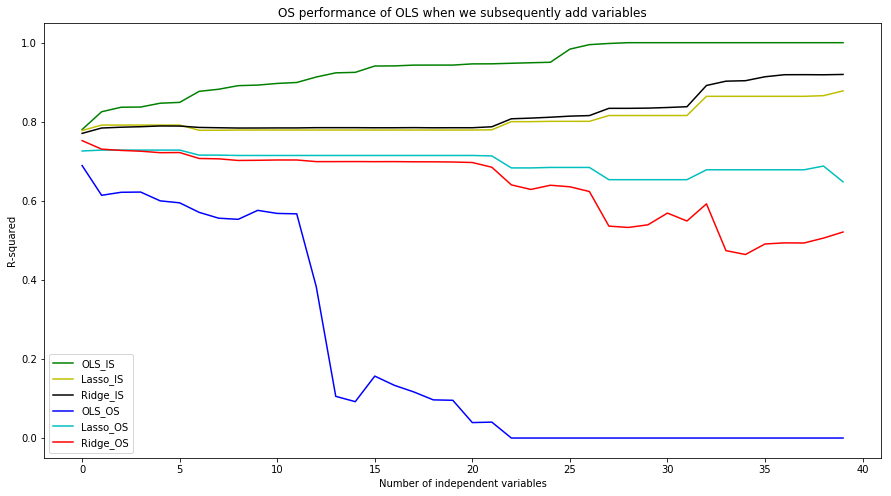

In [19]:
OLS_R_2_OS_F=[]
OLS_R_2_IS_F=[]
OLS_R_2_Ridge_OS_F=[]
OLS_R_2_Ridge_IS_F=[]
OLS_R_2_Lasso_OS_F=[]
OLS_R_2_Lasso_IS_F=[]

Number_variables=range(len(data_train.columns[:-1]))
Ridge=linear_model.Ridge(fit_intercept=True,alpha=3000)
Lasso=linear_model.Lasso(fit_intercept=True, alpha=30)

for j in Number_variables:
    # OLS
    lm = smf.ols(formula = 'Y ~ '+ '+'.join(data_train.columns[:j+1]), 
                 data = pd.concat([X_train.ix[:,:j+1],y_train], axis = 1)).fit()
    error = lm.predict(X_test.ix[:,:j+1]) - y_test
    R_2_OS_OLS=1-error.var()/y_test.var()
    R_2_IS_OLS = lm.rsquared
    OLS_R_2_IS_F.append(R_2_IS_OLS)
    OLS_R_2_OS_F.append(max(R_2_OS_OLS,0))
    
    # Ridge
    Ridge.fit(X_train.ix[:,:j+1],y_train)
    
    # In sample:
    err_IS=Ridge.predict(X_train.ix[:,:j+1]) - y_train
    R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Ridge_IS_F.append(R_2_IS_Ridge)
    
    #Out of sample
    err_OS=Ridge.predict(X_test.ix[:,:j+1]) - y_test
    R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
    OLS_R_2_Ridge_OS_F.append(max(R_2_OS_Ridge,0))

    # Lasso
    
    Lasso.fit(X_train.ix[:,0:j+1],y_train)
    
    #In sample:
    p_IS=Lasso.predict(X_train.ix[:,0:j+1])
    err_IS=p_IS-y_train
    R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Lasso_IS_F.append(R_2_IS_Lasso)

    #Out of sample
    p_OS=Lasso.predict(X_test.ix[:,0:j+1])
    err_OS=p_OS-y_test
    R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
    OLS_R_2_Lasso_OS_F.append(max(R_2_OS_Lasso,0))

fig = plt.figure(figsize=(15,8))
plt.title('OS performance of OLS when we subsequently add variables')

plt.plot(Number_variables,OLS_R_2_IS_F,'g',label='OLS_IS')
plt.plot(Number_variables,OLS_R_2_Lasso_IS_F,'y',label='Lasso_IS')
plt.plot(Number_variables,OLS_R_2_Ridge_IS_F,'k',label='Ridge_IS')

plt.plot(Number_variables,OLS_R_2_OS_F,'b',label='OLS_OS')
plt.plot(Number_variables,OLS_R_2_Lasso_OS_F,'c',label='Lasso_OS')
plt.plot(Number_variables,OLS_R_2_Ridge_OS_F,'r',label='Ridge_OS')

plt.legend(loc='lower left')
plt.xlabel('Number of independent variables')
plt.ylabel('R-squared')
plt.show()

# Extracredit (100 pts of credit to be applied towards this or any other homework)
Using a series of 10 random splits (cross-validation) of the training sample into approximately 70% training and 30% validation samples perform the selection of the optimal $\lambda$ for Ridge and Lasso regression:   

a) For each $\lambda$ of an assumed sequence of $\lambda$'s(take a random range) compute validation R2 for all the 10 splits and finally select the $\lambda$ having the highest value for validation R2 for each split.  

b) Visualize the dependence of the validation R2 over $\lambda$s for Lasso and Ridge(x-axis = $\lambda$s from sequence, y-axis = corresponding R^2, graph for each split)

c) Report the R2 computed over the test set for the Lasso and Ridge trained over the entire training set with the selected optimal values of $\lambda$ out of the 10 splits.